In [1]:
import pandas as pd
import numpy as np
import os

from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [14]:
# 1.1 Lire le Dataframe train (avec les champs Survived). Afficher les 10 premières lignes.

train_clean = pd.read_csv("../machineLearning/machineLearning/data/Module2/train_clean.csv")

train_clean.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,1,0,3,1,22.0,7.2500,0,0,1
1,2,1,1,0,38.0,71.2833,1,0,3
2,3,1,3,0,26.0,7.9250,0,1,2
3,4,1,1,0,35.0,53.1000,0,0,3
4,5,0,3,1,35.0,8.0500,0,1,1
5,6,0,3,1,41.0,8.4583,2,1,1
6,7,0,1,1,54.0,51.8625,0,1,1
7,8,0,3,1,2.0,21.0750,0,0,4
8,9,1,3,0,27.0,11.1333,0,0,3
9,10,1,2,0,14.0,30.0708,1,0,3


In [6]:
# 1.2 Lire le Dataframe test (sans les champs Survived) dans les fichiers test_clean.csv. Afficher les 10 premières lignes.

test_clean = pd.read_csv("../machineLearning/machineLearning/data/Module2/test_clean.csv")

test_clean.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,892,3,1,34.5,7.8292,2,1,1
1,893,3,0,47.0,7.0000,0,0,3
2,894,2,1,62.0,9.6875,2,1,1
3,895,3,1,27.0,8.6625,0,1,1
4,896,3,0,22.0,12.2875,0,0,3
5,897,3,1,14.0,9.2250,0,1,1
6,898,3,0,30.0,7.6292,2,1,2
7,899,2,1,26.0,29.0000,0,0,1
8,900,3,0,18.0,7.2292,1,1,3
9,901,3,1,21.0,24.1500,0,0,1


In [7]:
# 1.3 Charger les features d'apprentissage dans un array numpy X_alltrain. Afficher le type de X_alltrain les 10 premières lignes.

X_alltrain = train_clean.values[:,2:]

print(type(X_alltrain))
print(X_alltrain[:10])

<class 'numpy.ndarray'>
[[ 3.      1.     22.      7.25    0.      0.      1.    ]
 [ 1.      0.     38.     71.2833  1.      0.      3.    ]
 [ 3.      0.     26.      7.925   0.      1.      2.    ]
 [ 1.      0.     35.     53.1     0.      0.      3.    ]
 [ 3.      1.     35.      8.05    0.      1.      1.    ]
 [ 3.      1.     41.      8.4583  2.      1.      1.    ]
 [ 1.      1.     54.     51.8625  0.      1.      1.    ]
 [ 3.      1.      2.     21.075   0.      0.      4.    ]
 [ 3.      0.     27.     11.1333  0.      0.      3.    ]
 [ 2.      0.     14.     30.0708  1.      0.      3.    ]]


In [8]:
# 1.4 Charger les labels dans un array numpy y_alltrain. Afficher les 10 premières lignes.

Y_alltrain = train_clean.values[:,1]
print(Y_alltrain[:10])

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]


In [15]:
# 1.5 Séparer les features et les labels en deux parties (train et dev). Afficher les nombres de lignes et de colonnes pour les 4 arrays.

X_train,X_dev,y_train,y_dev = train_test_split(X_alltrain, Y_alltrain, random_state=0)

print('Nombre de lignes x_train :', X_train.shape[0])
print('Nombre de colonnes x_train :', X_train.shape[1])

print('Nombre de lignes y_train :', y_train.shape[0])
print('Nombre de colonne y_train :', y_train.shape[1])

print('Nombre de lignes x_dev :', X_dev.shape[0])
print('Nombre de colonnes x_dev :', X_dev.shape[1])

print('Nombre de lignes y_dev :', y_dev.shape[0])
print('Nombre de colonne y_dev :', y_dev.shape[1])

Nombre de lignes x_train : 668
Nombre de colonnes x_train : 7
Nombre de lignes y_train : 668


IndexError: tuple index out of range

In [10]:
# 1.6 Afficher les noms des features.

print(train_clean.columns[2:].tolist())

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone', 'Title']


In [11]:
# Fonctions utilitaires

# Fonctions permettant de générer le fichier d'envoi à Kaggle
# Paramètres : Classifier; Données à calculer ; index)

def generer_resultats(clf,df_test=test_clean):
    """
    Fonctions permettant de générer le fichier d'envoi à Kaggle.
    On passe un classifier sur lequel on refait le training avec toutes les données de training

    Parameters
    ----------
    Classifiers : Classifier utilisé pour la prédiction
    data : Données à calculer. par défaut, les valeurs du dataset "test"
    idx : Index des passagers testés. Stockés dans finalfile_index lors de la lecture des données
    """
    data = df_test.iloc[:,1:].values
    idx = df_test.PassengerId
    print(clf.get_params())
    clf.fit(X_alltrain, Y_alltrain)
    prediction=clf.predict(data)
    results=pd.DataFrame(prediction.astype(int), index = df_test.PassengerId, columns=['Survived'])
    results.to_csv('resultats%s.csv'%clf.__class__.__name__)

#Fonction pour l'affichage 2 D des résultats

def plot_decision_boundary(clf,X,y, axes=[0, 85, 0, 300], axis_name=['x1','x2'],alpha=0.5, contour=True):
    """
    Fonction pour l'affichage 2 D des résultats

    Parameters
    ----------
    clf : Classifier à afficher
    X : features de Données a afficher
    y : labels de Données a afficher
    axes : : Tailles des axes (valeur min/max)
    axis_name : Nom des axes sur le graphique
    alpha : Transparence des points
    contour : Afichage du contour
    """
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)


    df_X_y = pd.concat([pd.DataFrame(X,columns=['f1','f2']),pd.DataFrame(y,columns=['label'])],axis=1)
    plt.plot(
        df_X_y.loc[df_X_y.label==0,'f1'].values,
        df_X_y.loc[df_X_y.label==0,'f2'].values,
        "ro", label="Disparu",
        alpha=alpha
    )
    plt.plot(
        df_X_y.loc[df_X_y.label==1,'f1'].values,
        df_X_y.loc[df_X_y.label==1,'f2'].values,
        "gs", label="Rescapé",
        alpha=alpha
    )

    plt.axis(axes)
    plt.xlabel(axis_name[0], fontsize=18)
    plt.ylabel(axis_name[1]+ "  ",fontsize=18, rotation=0)
    plt.legend(loc="lower right", fontsize=14)


In [12]:
# 2.1 En utilisant l'exemple 1, construisez et entrainez un arbre de décision pour prévoir la survie.

tree_clf = DecisionTreeClassifier(max_depth=8, random_state=80)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=80)

In [13]:
# 2.2 Appliquer le modèle sur vos données de dev

pred = tree_clf.predict(X_dev)
print(pred)
print(accuracy_score(y_dev, pred))


[0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1.]
0.820627802690583


In [ ]:
# 2.3 : Essayez plusieurs valeurs pour max_depth et garder le meilleur résultat.
# Vous pouvez aussi tester d'autres paramètres disponible sur https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier



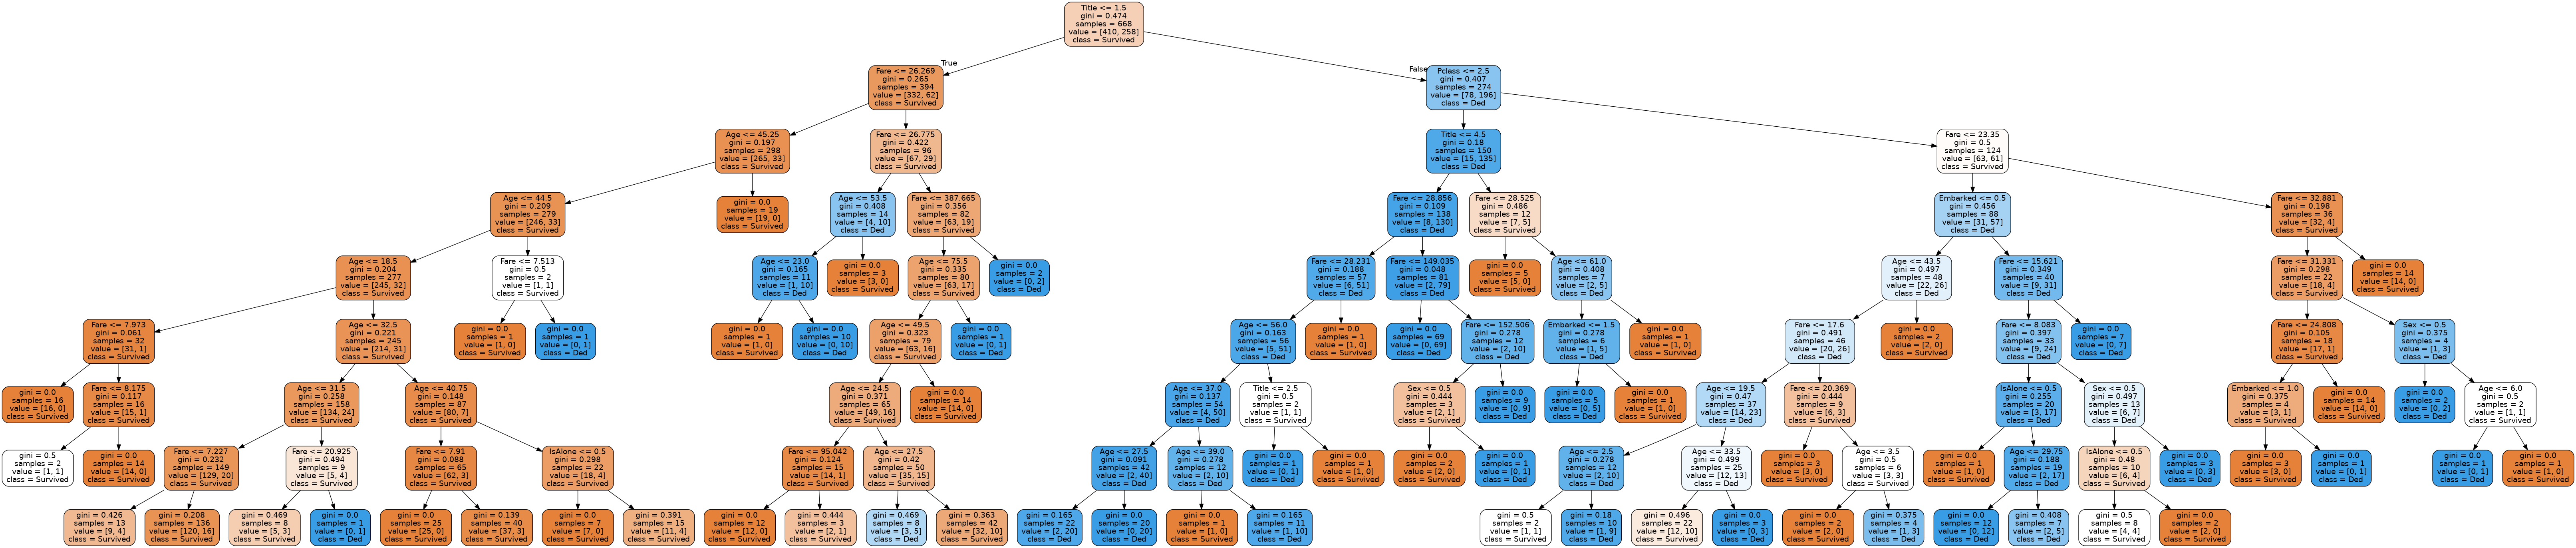

In [16]:
# 2.4 : Affichez l'arbre

export_graphviz(
    tree_clf,
    out_file="titanic_tree.dot",
    feature_names=train_clean.columns[2:].tolist(),
    class_names=["Survived","Ded"],
    rounded=True,
    filled=True
)

os.system("dot -Tpng titanic_tree.dot -o titanic_tree.png")

Image("titanic_tree.png")


In [17]:
# 2.5 Générez le fichier de résultats et envoyer une soumission sur Kaggle

generer_resultats(tree_clf)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 80, 'splitter': 'best'}


In [ ]:
# 2.6 Question : Quel est votre meilleur score et Classement ?

# Score : 0.75837 , classement : 12667


In [18]:
# 3.1 En utilisant l'exemple 5, Réalisez un algorithme de Random Forest sur les données Titanic.

tree_rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
tree_rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
# 3.2 Classez les features par ordre d'importance.



In [ ]:
# 3.3 Tester dans une boucle différentes valeurs pour max_depth et max_features de l'arbre et pour le nombre d'estimateurs.

In [ ]:
# 3.4 Générer un fichier et envoyer les résultats sur Kaggle. Ecrivez ici vos résultats.

In [ ]:
# 3.5 En utilisant la fonction plot_decision_boundary, afficher les résultats pour de l'arbre seul et du modèle de forêt les variables Fare et Age Au moins 3 arguments sont attendus. clf : Classifier à afficher (Il doit être entraîné sur les 2 variables Fare et Age) X : features de Données a afficher y : labels de Données a afficher

In [ ]:
# 4.1 En vous inspirant de l'exemple 6, Testez ici Adaboost

In [ ]:
# 4.2 Afficher les résultats. Essayer differents paramètres de max depth, nombre d'estimateurs, taille des arbres ...

In [ ]:
# 4.3 Appliquer le "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sans Early Stopping.


In [ ]:
# 4.4 Générer un fichier et envoyer les résultats sur Kaggle. Ecrivez ici vos résultats.


In [ ]:
# 4.5 Relancer les modèles de Gradient Boosting avec et sans Early Stopping, en n'utilisant que les variables Age et Fare.



In [ ]:
# 4.6 Afficher les résultats avec et sans Early Stopping avec la fonction plot_decision_boundary
